In [1]:
#imports
import tensorflow as tf
import numpy as np
import Normal_Distribution_Data as data #input file name here 
import matplotlib.pyplot as plt
import Gen_Neural_Network as nn 

In [2]:
#load input data for function
training = data.create_training_set(1000, 100)
x_train = training[0]
mu_train = training[1] 
alpha_train = training[2] 
beta_train = training[3]
y_train = np.vstack((mu_train, alpha_train, beta_train))  
y_train = y_train.T 

testing = data.create_training_set(300, 100)
x_test = testing[0] 
mu_test = testing[1] 
alpha_test = testing[2] 
beta_test = testing[3] 
y_test = np.vstack((mu_test, alpha_test, beta_test)) 
y_test = y_test.T



In [6]:
#set values for network 
num_inputs = 100
factor = 2
num_labels = 3
model_name = "normal_distribution.model"

In [7]:
#test and train model based on elements
model = nn.set_model() 
nn.train(model, num_inputs, factor, num_labels, x_train, y_train) 
nn.test(model, x_test, y_test) 
nn.save(model, model_name) 

Train on 1000 samples
Epoch 1/100
1000/1000 [==============================] - 1s 985us/sample - loss: 0.6073 - root_mean_squared_error: 0.7793
Epoch 2/100
1000/1000 [==============================] - 0s 134us/sample - loss: 0.0857 - root_mean_squared_error: 0.2928
Epoch 3/100
1000/1000 [==============================] - 0s 125us/sample - loss: 0.0190 - root_mean_squared_error: 0.1379
Epoch 4/100
1000/1000 [==============================] - 0s 124us/sample - loss: 0.0085 - root_mean_squared_error: 0.0923
Epoch 5/100
1000/1000 [==============================] - 0s 131us/sample - loss: 0.0049 - root_mean_squared_error: 0.0698
Epoch 6/100
1000/1000 [==============================] - 0s 129us/sample - loss: 0.0036 - root_mean_squared_error: 0.0599
Epoch 7/100
1000/1000 [==============================] - 0s 134us/sample - loss: 0.0031 - root_mean_squared_error: 0.0555
Epoch 8/100
1000/1000 [==============================] - 0s 214us/sample - loss: 0.0028 - root_mean_squared_error: 0.0532
Ep

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: normal_distribution.model/assets


In [8]:
#saves the model data
new_model = tf.keras.models.load_model('generalized_normal.model') 


In [9]:
#makes predictions for all elements in x_test array  
predictions = new_model.predict(x_test)

In [10]:
#transpose predictions and y test into column vectors for matrix mult purposes
predictions = predictions.T
y_test = y_test.T

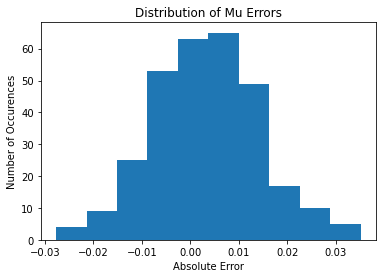

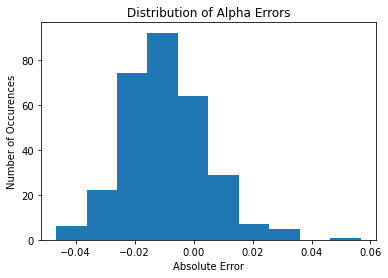

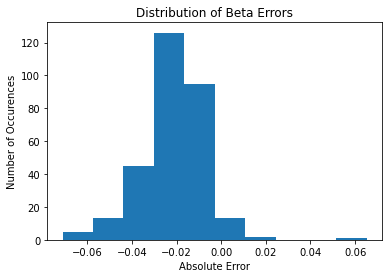

In [13]:
#absolute error in histograms 
#error: label 1
plt.hist(predictions[0]-y_test[0])
plt.title('Distribution of Mu Errors')
plt.ylabel('Number of Occurences')
plt.xlabel('Absolute Error')
plt.show()

#error: label 2
plt.hist(predictions[1]-y_test[1])
plt.title('Distribution of Alpha Errors')
plt.ylabel('Number of Occurences')
plt.xlabel('Absolute Error')
plt.show()

#error: label 3
plt.hist(predictions[2]-y_test[2])
plt.title('Distribution of Beta Errors')
plt.ylabel('Number of Occurences')
plt.xlabel('Absolute Error')
plt.show()